# Ethereum Analysis
## Attempt to determine the direction of crypto asset movement based on selected market information as well as to identify if there are leading indicators that could point the direction of movement. 
### Data obtained from [Coinmetrics](https://docs.coinmetrics.io/api/v4) API 

In [1]:
import os
import matplotlib 
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from coinmetrics.api_client import CoinMetricsClient
import pandas as pd

%matplotlib inline

In [2]:
# Obtain data by specifying coin and data needed
client = CoinMetricsClient()
eth_metrics = client.get_asset_metrics(assets='eth',metrics=['PriceUSD','AdrActCnt','CapMrktCurUSD','CapMVRVCur','NVTAdj','VelCur1yr','TxCnt','TxTfrValAdjUSD','SplyCur','HashRate'],start_time='2021-01-01', end_time='2021-08-10',frequency='1d')
eth_metrics = pd.DataFrame(eth_metrics)
eth_metrics['time'] = pd.to_datetime(eth_metrics['time'])
eth_metrics = eth_metrics.set_index('time')
eth_metrics
eth_metrics.to_csv('resources/eth_annual_metrics/eth_metrics_1.csv')

In [3]:
# Select coin metrics from Coinmetrics API and convert to float
eth_metrics = eth_metrics[['PriceUSD','CapMrktCurUSD','CapMVRVCur','NVTAdj','VelCur1yr','AdrActCnt','TxCnt','TxTfrValAdjUSD','SplyCur','HashRate']].astype('float').round(2)
eth_metrics.tail()

,PriceUSD,CapMrktCurUSD,CapMVRVCur,NVTAdj,VelCur1yr,AdrActCnt,TxCnt,TxTfrValAdjUSD,SplyCur,HashRate
time,,,,,,,,,,
2021-07-31 00:00:00+00:00,2544.38,2.974903e+11,1.73,37.37,22.28,617087.0,1212322.0,7.959753e+09,1.169207e+08,529.37
2021-08-01 00:00:00+00:00,2563.74,2.997877e+11,1.74,54.53,22.27,611381.0,1190618.0,5.497474e+09,1.169339e+08,537.36
2021-08-02 00:00:00+00:00,2619.04,3.062894e+11,1.76,48.90,22.26,648782.0,1269470.0,6.263579e+09,1.169472e+08,548.17
2021-08-03 00:00:00+00:00,2512.92,2.939115e+11,1.71,40.84,22.25,599206.0,1219663.0,7.196205e+09,1.169604e+08,557.91
2021-08-04 00:00:00+00:00,2727.93,3.190962e+11,1.79,37.55,22.25,605815.0,1223841.0,8.497730e+09,1.169736e+08,562.15


## Historical Prices

<AxesSubplot:title={'center':'ETH Price'}, xlabel='time', ylabel='ETH Price ($)'>

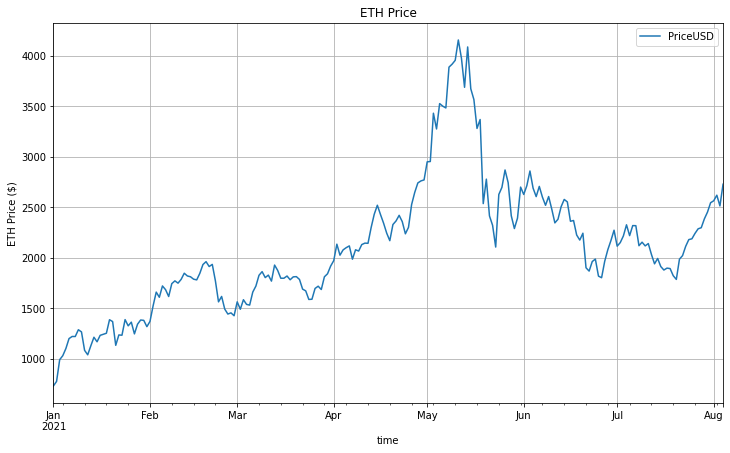

In [4]:
# Plot ETH historical prices in USD
eth_price = eth_metrics[['PriceUSD']]
eth_price.plot(figsize= (12,7), grid=True, title="ETH Price", ylabel='ETH Price ($)')

## EMA

<AxesSubplot:title={'center':'EMA ETH'}, xlabel='time', ylabel='ETH Price ($)'>

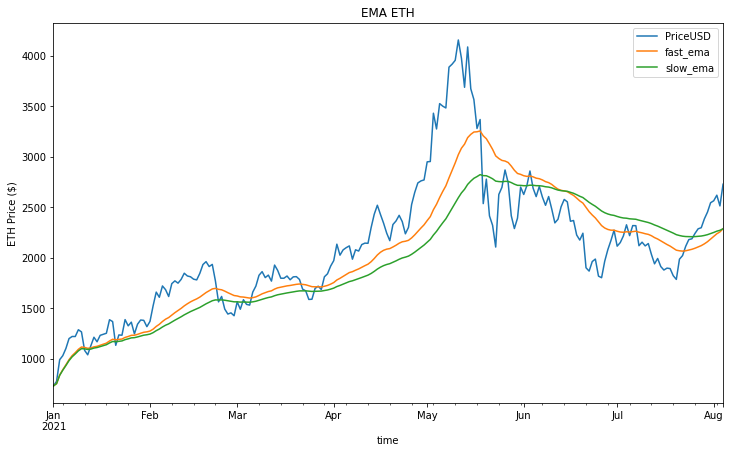

In [5]:
# Set short and long windows for EMA (Exponential Moving Average)
short_window = 10
long_window = 20

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
eth_metrics['fast_ema'] = eth_metrics['PriceUSD'].ewm(halflife=short_window).mean()
eth_metrics['slow_ema'] = eth_metrics['PriceUSD'].ewm(halflife=long_window).mean()

# Plot the EMA of ETH closing prices
eth_metrics[['PriceUSD', 'fast_ema', 'slow_ema']].plot(figsize=(12,7), title='EMA ETH', ylabel='ETH Price ($)') 

In [6]:
# A bullish crossover occurs when the fast EMA (10-day) crosses above a slow EMA (20-day). Bearish signal is opposite, when fast EMA crosses below slow EMA  

## Velocity

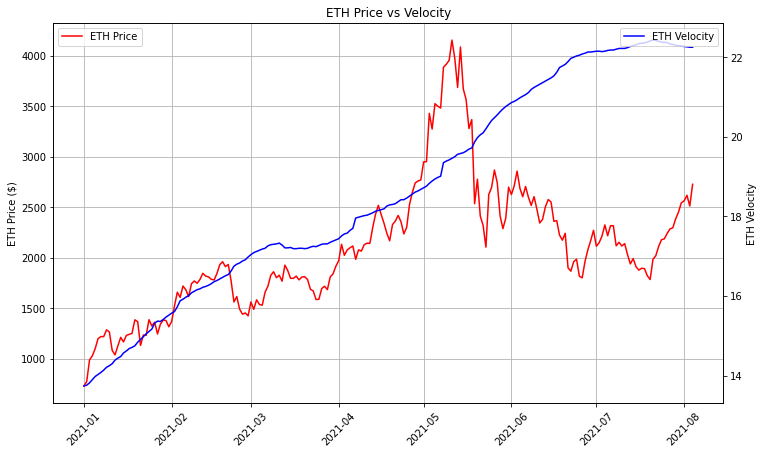

In [7]:
# Plot coin velocity vs coin price (velocity has inverse correlation with coin price)
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'], label ='ETH Price', color='r')
ax.set_ylabel('ETH Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['VelCur1yr'], label='ETH Velocity', color='b')
ax.set_title('ETH Price vs Velocity')
ax2.set_ylabel('ETH Velocity') 
ax2.legend(loc='upper right')

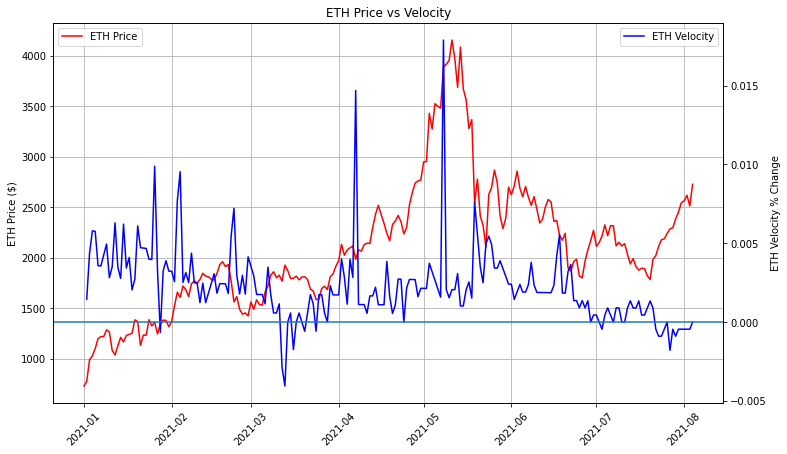

In [8]:
# Plot % Velocity change
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'], label ='ETH Price', color='r')
ax.set_ylabel('ETH Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['VelCur1yr'].pct_change().dropna(), label='ETH Velocity', color='b')
ax.set_title('ETH Price vs Velocity')
ax2.set_ylabel('ETH Velocity % Change') 
ax2.legend(loc='upper right')
plt.axhline(0)

In [9]:
# Velocity is inversly correlated with coin price movement. Note the change (increase) in velocity before the correction.

## NVT - Network Value to Transaction

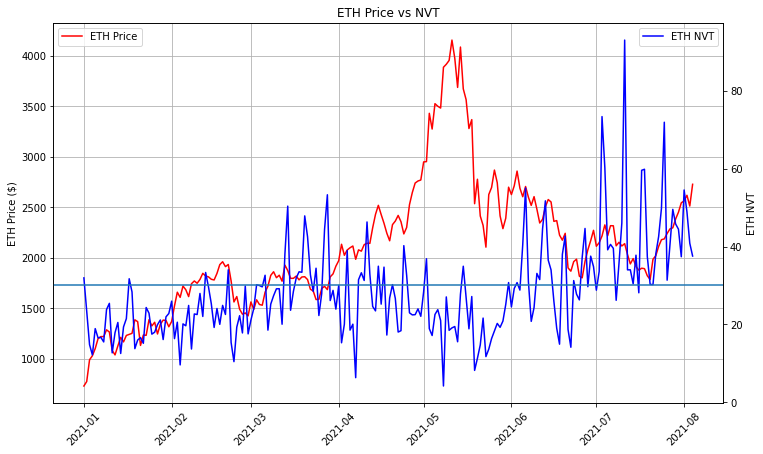

In [10]:
# Plot coin NVT - Network Value to Transaction (NVT) Ratio describes the relationship between market cap and transfer volumes (it is equivalent to P/E ratio)
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'], label ='ETH Price', color='r')
ax.set_ylabel('ETH Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['NVTAdj'], label='ETH NVT', color='b')
ax.set_title('ETH Price vs NVT')
ax2.set_ylabel('ETH NVT') 
ax2.legend(loc='upper right')
plt.axhline(30)

In [11]:
# It appears that NVT of approx. 30 was maintaining a balance between the network value growth and transaction volume growth. 
# NVT increase occurs when transactions are growing at a slower rate than the market cap, indicating that the network is over-valued thus signaling bear market.
# NVT decrease occurs when transaction volumes are outpacing the market cap increase, suggesting that the network is under-valued signaling bull market

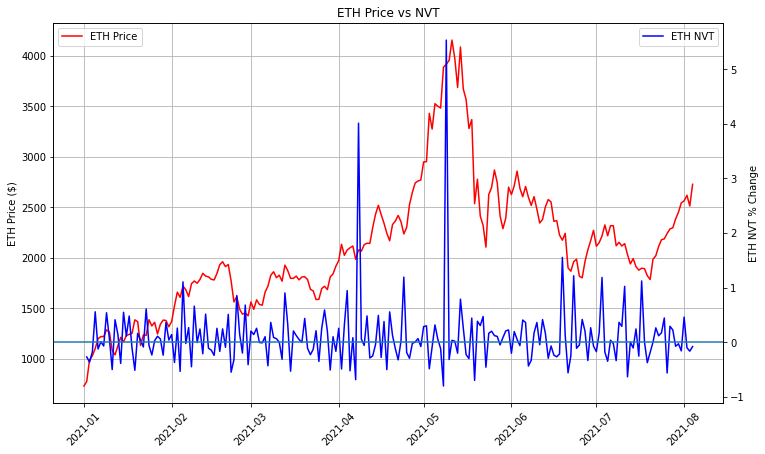

In [12]:
# Plot % NVT Change 
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'],label ='ETH Price', color='r')
ax.set_ylabel('ETH Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['NVTAdj'].pct_change().dropna(), label='ETH NVT', color='b')
ax.set_title('ETH Price vs NVT')
ax2.set_ylabel('ETH NVT % Change') 
ax2.legend(loc='upper right')
plt.axhline(0)

In [13]:
# Note the sharp change in NVT before the correction

## Transaction Count

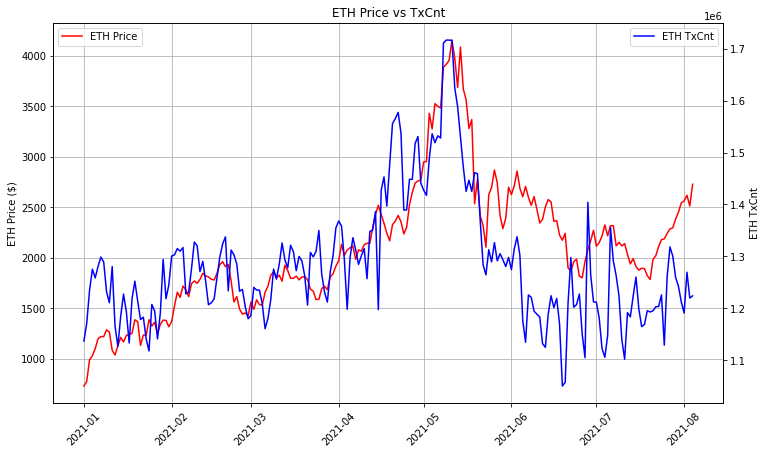

In [14]:
# Plot Tx Count change
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'],label ='ETH Price', color='r')
ax.set_ylabel('ETH Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['TxCnt'], label='ETH TxCnt', color='b')
ax.set_title('ETH Price vs TxCnt')
ax2.set_ylabel('ETH TxCnt') 
ax2.legend(loc='upper right')

In [15]:
# Note the sharp increase in transaction count before the correction

## Transaction Volume

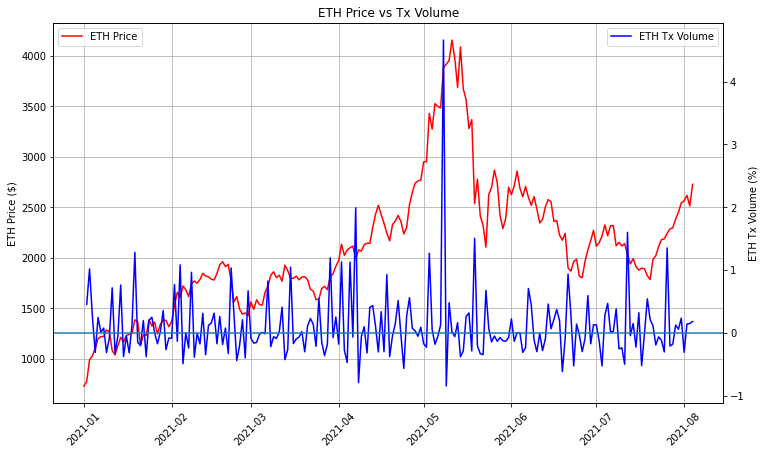

In [16]:
# Plot Tx Volume % change
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'],label ='ETH Price', color='r')
ax.set_ylabel('ETH Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['TxTfrValAdjUSD'].pct_change().dropna(), label='ETH Tx Volume', color='b')
ax.set_title('ETH Price vs Tx Volume')
ax2.set_ylabel('ETH Tx Volume (%)') 
ax2.legend(loc='upper right')
plt.axhline(0)

In [17]:
# Sharp spike in transaction volume may indicate that the coin was overbought and ready for correction that happened soon afterwards. 

## ETH Hash Rate

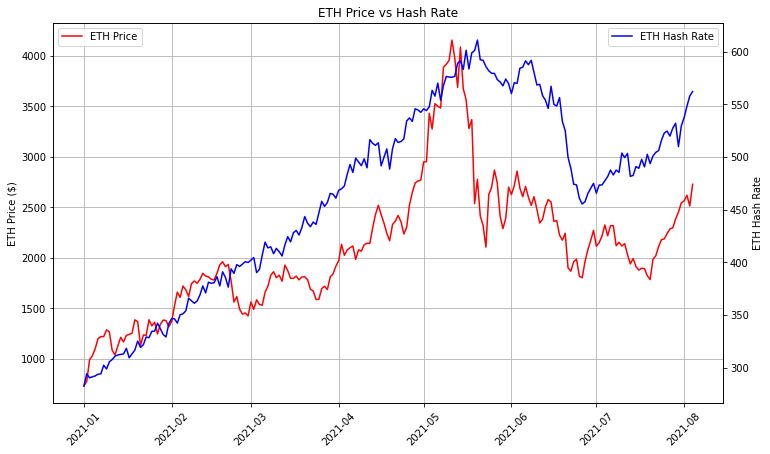

In [18]:
# Plot Hash Rate Change

fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'],label ='ETH Price', color='r')
ax.set_ylabel('ETH Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['HashRate'], label='ETH Hash Rate', color='b')
ax.set_title('ETH Price vs Hash Rate')
ax2.set_ylabel('ETH Hash Rate') 
ax2.legend(loc='upper right')

In [19]:
# Hash Rate is important because it shows the growth of the network as well as increase in network security. Note the drop in network hash rate starting in May which coincides with China crypto crackdown.

# MVRV

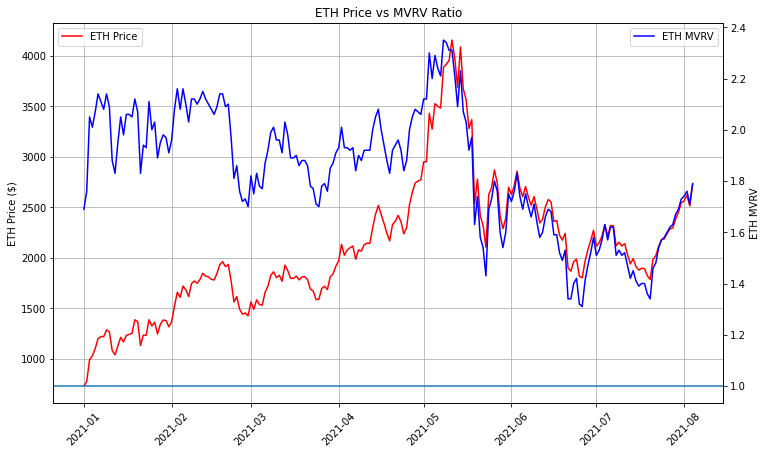

In [20]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(eth_metrics['PriceUSD'],label ='ETH Price', color='r')
ax.set_ylabel('ETH Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(eth_metrics['CapMVRVCur'], label='ETH MVRV', color='b')
ax.set_title('ETH Price vs MVRV Ratio')
ax2.set_ylabel('ETH MVRV') 
ax2.legend(loc='upper right')
plt.axhline(1)

In [21]:
# The ratio of the sum USD value of the current supply to the sum "realized" USD value of the current supply. This ratio potentially indicates periods of overvaluation (when network value far exceeds its historical relationship to realized cap) and undervaluation.